# Tugas Pengolahan Citra Digital (Konvolusi dan Korelasi)
- Nama    : Michael Setiyanto Silambi
- NIM     : 1306620041
- Program Studi Fisika A 2020

In [69]:
# Import Modul
import timeit
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
from scipy import ndimage, misc
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import cv2
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color

In [70]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

### Membuktikan bahwa konvoulis sama dengan korelasi yang kernelnya diputar  180 derajat 

##### Konvolusi 2d dan Korelasi 2d

C:\Users\hi\AppData\Local\Temp\ipykernel_3044\2415959800.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = cv2.cvtColor(source, cv2.COLOR_BGR2RGB).astype(np.float) # mengubah channel menjadi rgb dan ke tipe float


Text(0.5, 1.0, "Difference Image (correl' - convol)")

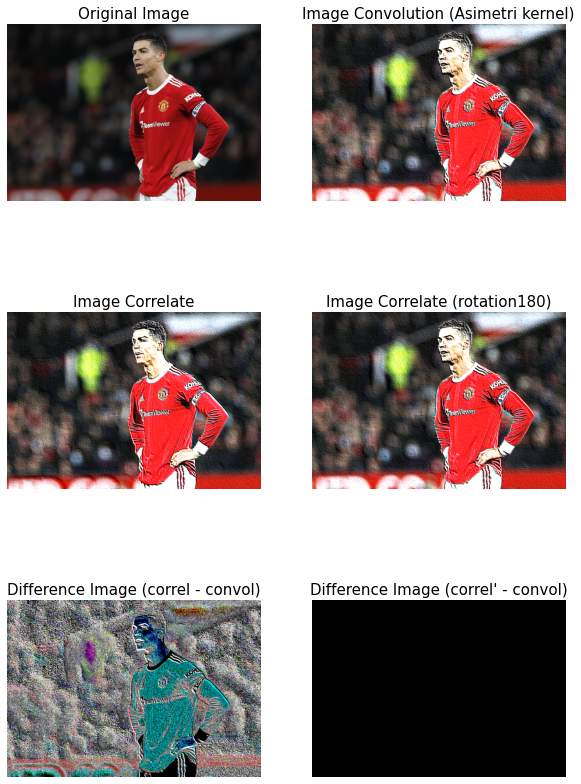

In [71]:
# Input Gambar
source = cv2.imread("7ronaldo.jpg") # menginput gambar
im = cv2.cvtColor(source, cv2.COLOR_BGR2RGB).astype(np.float) # mengubah channel menjadi rgb dan ke tipe float


# Kernel yang digunakan (asimetri)
kernel = np.array(np.array([[1,-1,9],[1,0,-1],[-9,1,1]])).reshape((3, 3, 1))

# Fungsi rotasi matriks 180
def rotate_matrix(mat):
    rot = np.rot90(mat)
    return np.rot90(rot)

#Konvolusi menggunakan ndimage
im_cvl = ndimage.convolve(im, kernel, mode='nearest')
im_cvl= np.clip(im_cvl, 0, 255).astype(np.uint8) # clip (0 to 255) and convert to unsigned int


# Korelasi menggunakan ndimage
im_cor = ndimage.correlate(im, kernel)
im_cor = np.clip(im_cor, 0, 255).astype(np.uint8) # clip (0 to 255) and convert to unsigned int


# Korelasi rotasi menggunakan ndimage
kernel_rot = rotate_matrix(kernel)
im_cor1 = ndimage.correlate(im, kernel_rot)
im_cor1 = np.clip(im_cor1, 0, 255).astype(np.uint8) # clip (0 to 255) and convert to unsigned int


# Diff (membuktikan rotasi korelasi = konvolusi)
im_dif = im_cor - im_cvl # Korelasi dikurangi konvolusi

im_dif1 = im_cor1 - im_cvl # Rotasi korelasi dikurangi konvolusi


# Plotting Gambar
pylab.figure(figsize=(10,15))
pylab.subplot(321), pylab.imshow(im.astype(np.uint8)), pylab.axis('off')
pylab.title('Original Image', size=15)

pylab.subplot(322), pylab.imshow(im_cvl), pylab.axis('off')
pylab.title('Image Convolution (Asimetri kernel)', size=15)

pylab.subplot(323), pylab.imshow(im_cor), pylab.axis('off')
pylab.title('Image Correlate', size=15)

pylab.subplot(324), pylab.imshow(im_cor1), pylab.axis('off')
pylab.title('Image Correlate (rotation180)', size=15)

pylab.subplot(325), pylab.imshow(im_dif), pylab.axis('off')
pylab.title('Difference Image (correl - convol)', size=15)

pylab.subplot(326), pylab.imshow(im_dif1), pylab.axis('off')
pylab.title("Difference Image (correl' - convol)", size=15)


Dapat dilihat hasil gambar bahwa perbedaan korelasi kernel di rotasi 180 derajat dengan konvolusi kernel asimetri memberikan gambar hitam, matriksnya bernilai 0

sehingga dapat dikatakan bahwa korelasi rotasi 180 sama dengan konvolusi untuk kernel asimetri

### Buat source code perhitungan konvoulusi secara langsung, dan konvolusi dengan transformasi fourier

##### 1) Konvolusi Langsung

Time:  0.19132429999990563


<Figure size 432x288 with 0 Axes>

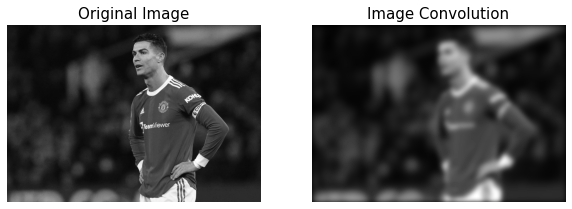

In [72]:
start = timeit.default_timer()

img = np.mean(imread('7ronaldo.jpg'), axis=2) # menginput gambar
pylab.gray()


kernel = np.outer(signal.gaussian(img.shape[0], 9), signal.gaussian(img.shape[1], 9))

#img_cvl = ndimage.convolve(im, kernel, mode="nearest")
img_cvl = signal.convolve(img, kernel, mode="same")


pylab.figure(figsize=(10,15))
pylab.subplot(321), pylab.imshow(img.astype(np.uint8)), pylab.axis('off')
pylab.title('Original Image', size=15)

pylab.subplot(322), pylab.imshow(img_cvl), pylab.axis('off')
pylab.title('Image Convolution', size=15)

stop = timeit.default_timer()

print('Time: ', stop - start)  

#### 2) Konvolusi FFT (grayscale)

<Figure size 432x288 with 0 Axes>

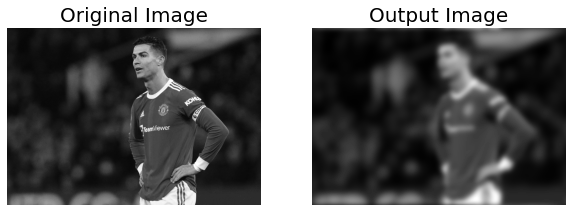

Time:  0.2435921999999664


In [73]:
start = timeit.default_timer()
im = np.mean(imread('7ronaldo.jpg'), axis=2) # menginput gambar
pylab.gray()


kernel = np.outer(signal.gaussian(img.shape[0], 9), signal.gaussian(img.shape[1], 9))

# Transformasi Fourier
freq = fp.fft2(img)
freq_kernel = fp.fft2(fp.ifftshift(kernel))


# Multiplication
convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain

# Inverse
im_inv = fp.ifft2(convolved).real

# Plotting
pylab.figure(figsize=(10,15))

pylab.subplot(2,2,1), pylab.imshow(img), pylab.title('Original Image', size=20), pylab.axis('off')
pylab.subplot(2,2,2), pylab.imshow(im_inv) # the imaginary part is an artifact

pylab.title('Output Image', size=20), pylab.axis('off')
pylab.show()

stop = timeit.default_timer()

print('Time: ', stop - start)  

(628, 900)


(<AxesSubplot:title={'center':'fftconvolve Output'}>,
 Text(0.5, 1.0, 'fftconvolve Output'),
 (-0.5, 899.5, 627.5, -0.5))

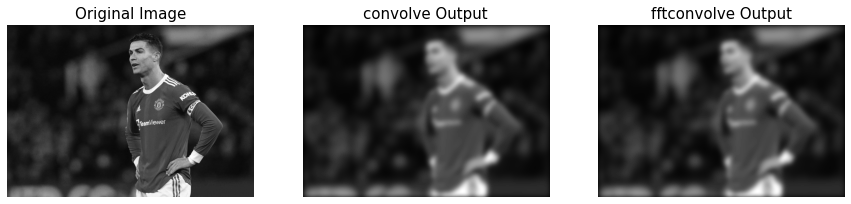

In [74]:
# Cara FFT menggunakan modul signal

im = np.mean(imread('7ronaldo.jpg'), axis=2)
print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 9), signal.gaussian(im.shape[1], 9)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_cv = signal.convolve(im, gauss_kernel, mode="same")
im_fft = signal.fftconvolve(im, gauss_kernel, mode='same')

pylab.figure(figsize=(15,5))
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_cv), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_fft), pylab.title('fftconvolve Output', size=15),pylab.axis('off')